In [ ]:
from keras.datasets import mnist

# **Visualizing**

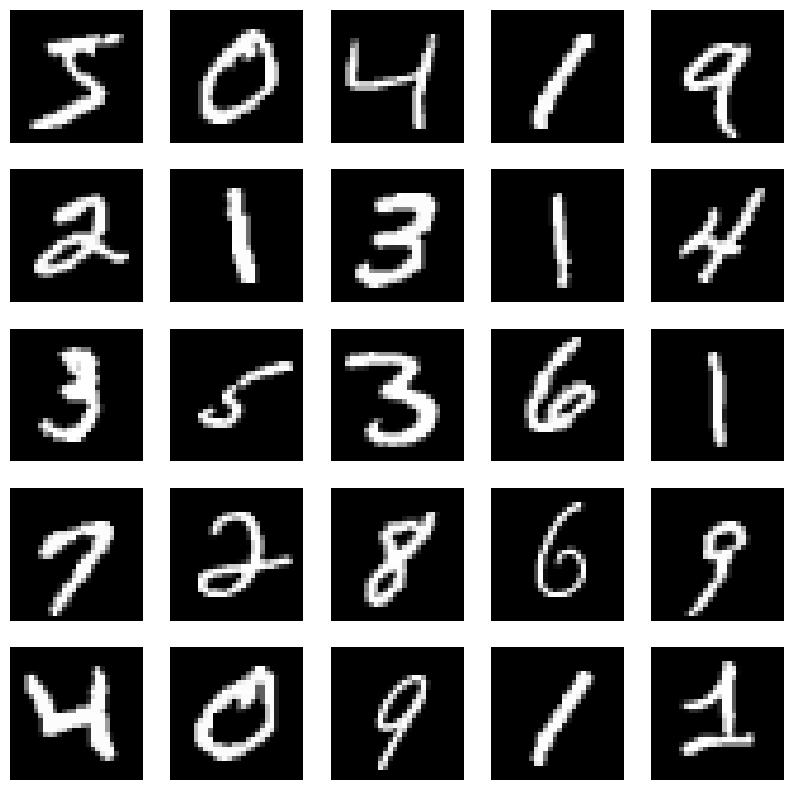

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualize the first few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

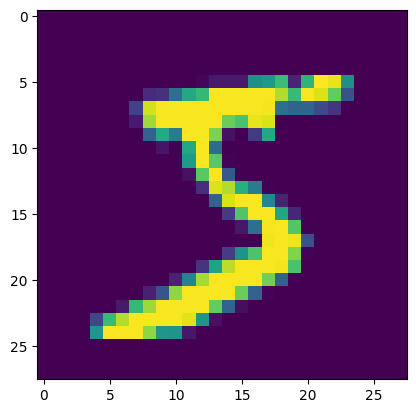

In [ ]:
plt.imshow(X_train[0])

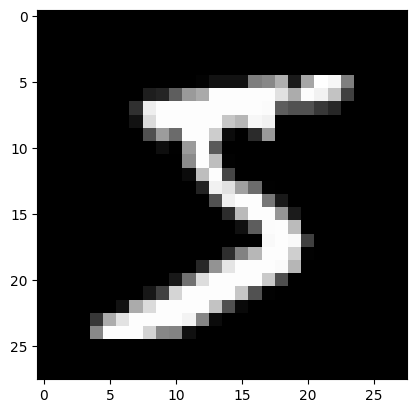

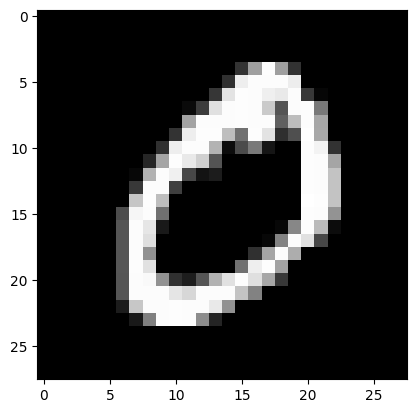

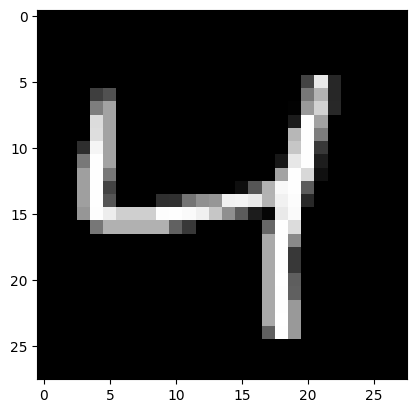

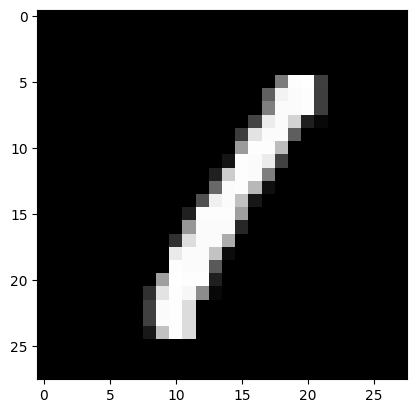

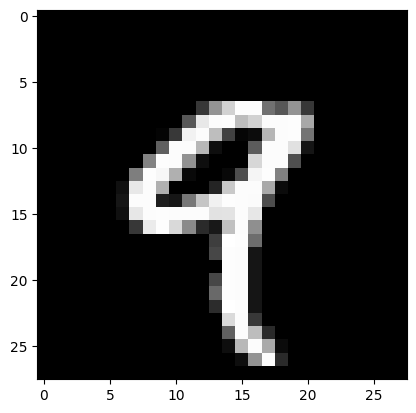

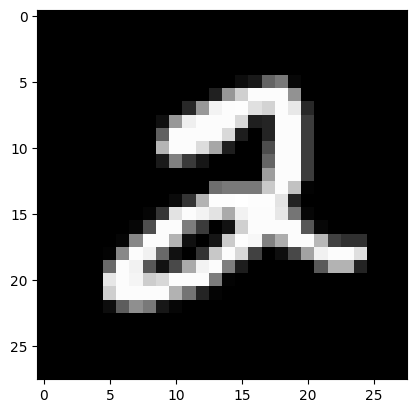

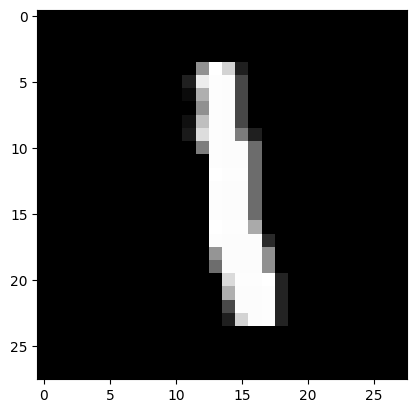

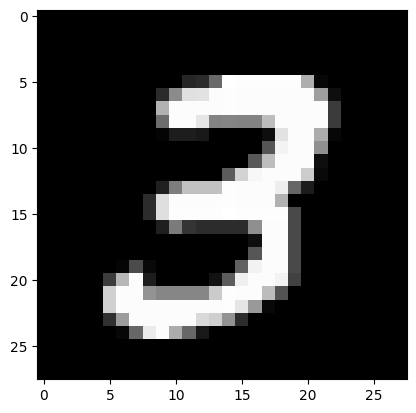

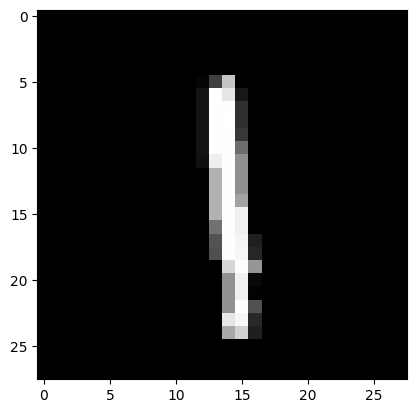

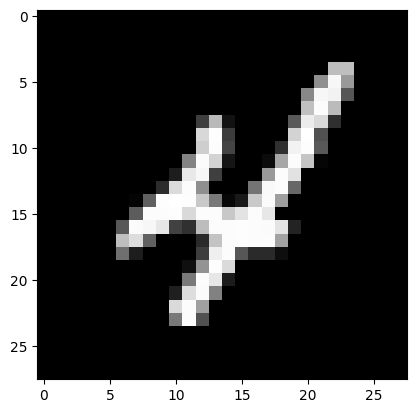

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

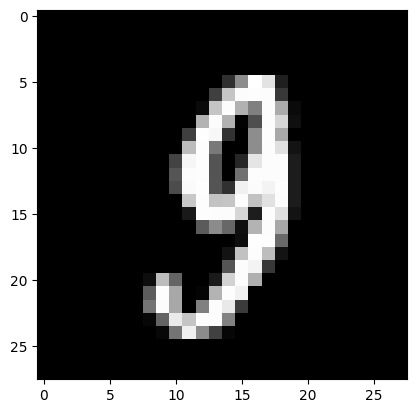

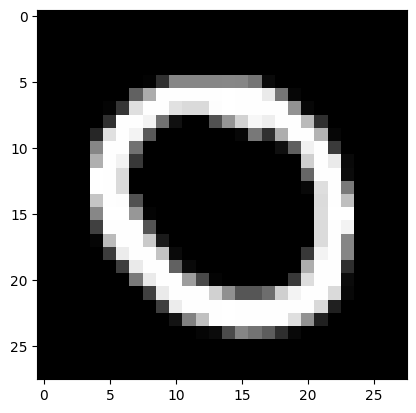

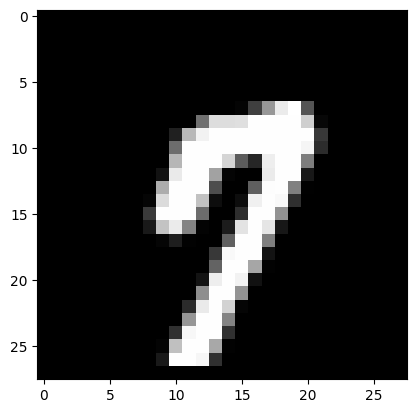

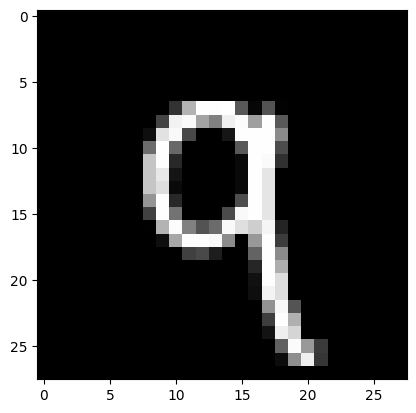

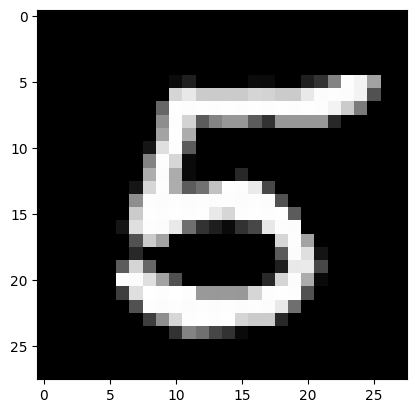

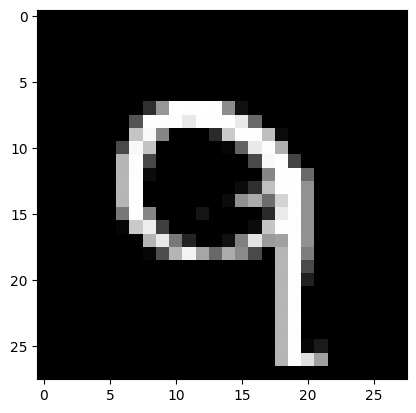

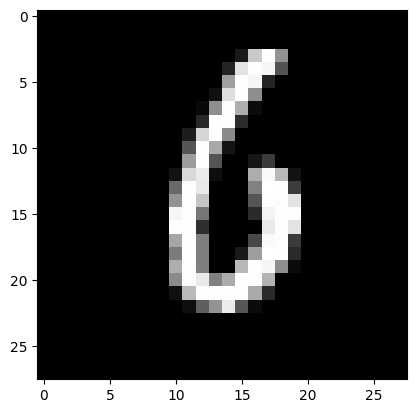

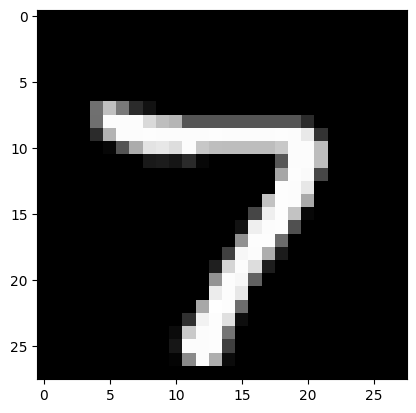

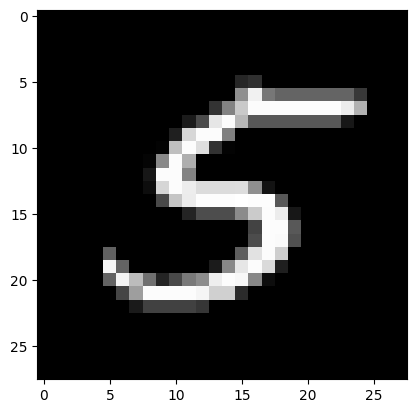

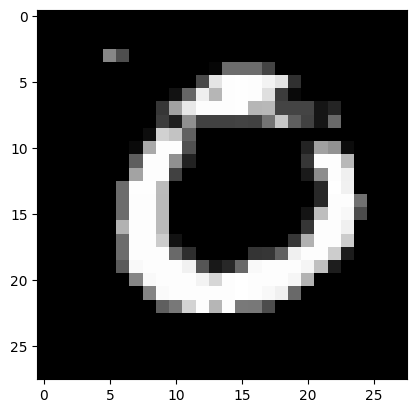

In [ ]:
import numpy as np

indices = np.random.choice(len(x_train), 10)
for i in indices:
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

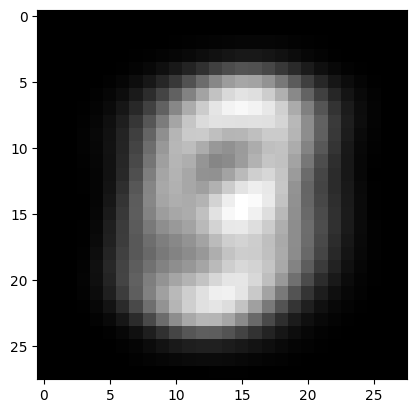

In [ ]:
mean_image = np.mean(x_train, axis=0)
plt.imshow(mean_image, cmap='gray')
plt.show()

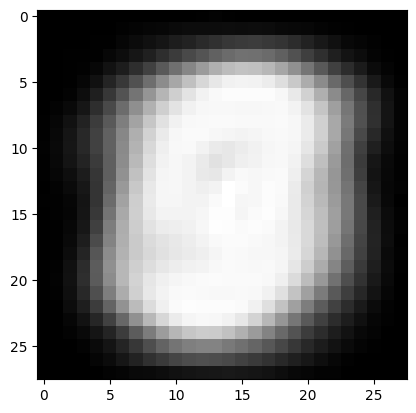

In [ ]:
std_image = np.std(x_train, axis=0)
plt.imshow(std_image, cmap='gray')
plt.show()

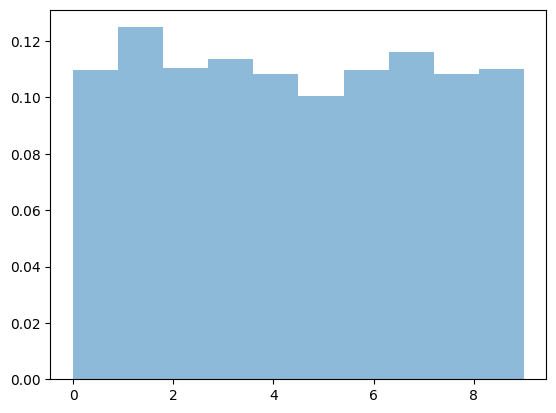

In [ ]:
plt.hist(y_train, bins=10, density=True, alpha=0.5)
plt.show()

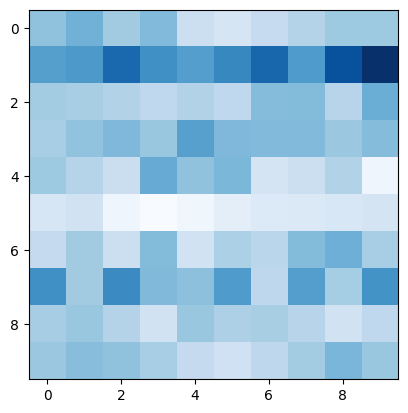

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = np.random.randint(10, size=len(x_train))
confusion_mat = confusion_matrix(y_train, y_pred)

plt.imshow(confusion_mat, cmap='Blues')
plt.show()

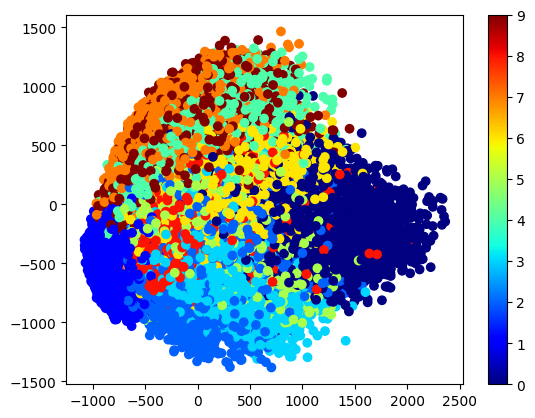

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_train.reshape(len(x_train), -1))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_train, cmap='jet')
plt.colorbar()
plt.show()

# **Preprocessing**

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

In [ ]:
import keras
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
from skimage.filters import gaussian
# Apply Gaussian filtering for noise reduction
train_images = gaussian(train_images, sigma=1)
test_images = gaussian(test_images, sigma=1)

In [ ]:
from skimage.filters import threshold_otsu
# Apply Otsu thresholding for image segmentation
thresh = threshold_otsu(train_images)
train_images = train_images > thresh
thresh = threshold_otsu(test_images)
test_images = test_images > thresh

In [ ]:
from skimage.feature import canny
# Apply Canny edge detection for feature extraction
train_images = canny(train_images)
test_images = canny(test_images)

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
train_images = pca.fit_transform(train_images)
test_images = pca.transform(test_images)

# Print the shape of the preprocessed data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 50)
Train labels shape: (60000, 10)
Test images shape: (10000, 50)
Test labels shape: (10000, 10)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reshape the images for the logistic regression model
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

# Create the logistic regression model
model = LogisticRegression(max_iter=10)
model.fit(train_images, train_labels)

# Make predictions
train_predictions = model.predict(train_images)
test_predictions = model.predict(test_images)

# Evaluate the model
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy: 0.8828166666666667
Test accuracy: 0.8888


In [52]:
from keras.utils import to_categorical

# Convert the true labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model architecture
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))  # Assuming 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with validation
history = model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 9.8540 - accuracy: 0.8402 - val_loss: 6.0081 - val_accuracy: 0.8872
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 6.2073 - accuracy: 0.8771 - val_loss: 6.1181 - val_accuracy: 0.8863
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.8660 - accuracy: 0.8842 - val_loss: 5.5925 - val_accuracy: 0.8967
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5135 - accuracy: 0.8845 - val_loss: 5.6183 - val_accuracy: 0.8897
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3022 - accuracy: 0.8879 - val_loss: 5.5895 - val_accuracy: 0.8935
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4186 - accuracy: 0.8868 - val_loss: 5.5851 - val_accuracy: 0.8932
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2495 - accuracy: 0.8899 - val_loss: 6.6642 - val_ac